In [1]:
import numpy as np

def pontos_2d(b,w,P):
    np.random.seed(10)
    X = [2*np.random.random_sample(P)-1,2*np.random.random_sample(P)-1]
    X = np.array(X)
    Y = []
    for i in range(P):
        if (X[1][i] **2 * w[1] + X[0][i]**2 * w[0] + b < 0):
            if (X[1][i] > 0.75) and (X[0][i]>0.5):
                Y.append(1)
            else:
                Y.append(-1)
        else:
            Y.append(1)
    return X,Y

In [2]:
def act(a):
    return 1.0/(1.0+np.exp(-a))

def dact(a):
    return np.exp(-a)/((1+np.exp(-a))**2)

def model(theta,x):
    f = feature_t(theta[0],x)
    a = theta[1][0] + np.dot(f.T, theta[1][1:])
    return a

def feature_t(w,a):
    for W in w:
        a = W[0] + np.dot(a.T,W[1:]) #MEXI AQUI
        a = act(a).T
    return a.T

def rn_cost(w,X,Y):
    N = len(X[:,0])
    P = len(X[0,:])
    cost = 0
    for p in range(P):
        c = model(w,X[:,p])
        cost += np.log(1+np.exp(-Y[p]*c))
    cost = cost /P
    return cost

def rn_grad(layer_sizes,theta,X,Y):
    N=len(X[:,0])
    P=len(X[0,:])
    grad=w_initializer(layer_sizes,0)
    for p in range(P):  #mexer aqui para mini_batch
        c = model(theta,X[:,p])
        k = Y[p]*np.exp(-Y[p]*c)/(1+np.exp(-Y[p]*c))
        dm = dmodel(layer_sizes,theta,X[:,p])
        for camada in range(len(layer_sizes)-2):
            grad[0][camada] += k * dm[0][camada]
        grad[1] += k * dm[1]
    for camada in range(len(layer_sizes)-2):
        grad[0][camada] /=-P
    grad[1] /=-P
    return grad

def grad_descent(layer_sizes,alpha,max_its,w,X,Y):
    num_camadas = len(layer_sizes)-2
    custo = rn_cost(w,X,Y)
    for k in range(max_its):
        custo_ant = custo
        grad_eval = rn_grad(layer_sizes,w,X,Y)
        for i in range(num_camadas):
            w[0][i] = w[0][i] - alpha*grad_eval[0][i]
        w[1] = w[1] - alpha*grad_eval[1]
        custo = rn_cost(w,X,Y)
        print('custo=',custo)
        if custo > custo_ant:
            alpha /=2
            for i in range(num_camadas):
                w[0][i] = w[0][i] + alpha*grad_eval[0][i]
            w[1] = w[1] + alpha*grad_eval[1]
            #alpha /= 2
            custo_ants = custo_ant
            
    return w
        
    
        
def w_initializer(layer_sizes,t):
    np.random.seed(11)
    scale = 2.0
    weights = []
    L = len(layer_sizes) - 1
    for k in range(L):
        U_k   = layer_sizes[k]
        U_k_1 = layer_sizes[k+1]
        
        if  t == 0:
            weight = np.zeros((U_k+1, U_k_1))
        else:
            weight = scale * np.random.randn(U_k+1, U_k_1)
        weights.append(weight)
        
    theta = [weights[:-1],weights[-1]]
    
    return theta

def dmodel(layer_sizes,theta,x):
    w  = theta[0]
    wt = theta[1]
    
    num_camadas = len(layer_sizes)-2
    
    grad = w_initializer(layer_sizes,0)
    
    W1 = w[0]
    a = W1[0] + np.dot(x.T,W1[1:])
    f1  = act(a).T
    df1 = dact(a).T
    
    W2 = w[1]
    a = W2[0] + np.dot(f1.T,W2[1:])
    f2 = act(a).T
    df2 = dact(a).T
    
    U2 = layer_sizes[num_camadas]
    U1 = layer_sizes[num_camadas-1]
    
    grad[1][0] = 1
    for i in range(U2):
        grad[1][i+1] = f2[i]
        
    for j in range(U2):  # 1o linha
        grad[0][1][0][j] = wt[j+1]*df2[j]
    for i in range(U1):
        for j in range(U2):  # 1o linha
            grad[0][1][i+1][j] = wt[j+1]*df2[j] * f1[i]
            
    xb = np.zeros(3)
    xb[1] = x[0]
    xb[2] = x[1]
    for i in range(3):        
        for j in range(U1):  # 1o linha
            for k in range(U2):
                grad[0][0][i][j] += wt[k+1]*df2[k]*W2[j+1][k]*df1[j]*xb[i]
    return grad
    

[[array([[ 3.49890948, -0.57214599, -0.96913026],
       [-5.30663712, -0.01656926, -0.63926273],
       [-1.07325872,  0.63080534,  0.84210143]]), array([[-2.13120596, -1.77247934],
       [-0.95146699,  1.37936462],
       [ 1.12238435, -2.61109702],
       [-2.23895052,  1.47367478]])], array([[ 3.14926815],
       [-0.06215018],
       [-1.36689325]])]
custo= [1.70213508]
custo= [0.67795143]
custo= [0.67733754]
custo= [0.67690925]
custo= [0.67637981]
custo= [0.67607006]
custo= [0.67560914]
custo= [0.67541849]
custo= [0.67500753]
custo= [0.67493612]
custo= [0.67454685]
custo= [0.6745866]
custo= [0.66691841]
custo= [0.66651574]
custo= [0.6661107]
custo= [0.66570319]
custo= [0.66529317]
custo= [0.66488059]
custo= [0.66446545]
custo= [0.66404774]
custo= [0.66362748]
custo= [0.66320472]
custo= [0.66277951]
custo= [0.66235191]
custo= [0.66192202]
custo= [0.66148993]
custo= [0.66105575]
custo= [0.66061961]
custo= [0.66018164]
custo= [0.65974198]
custo= [0.65930079]
custo= [0.65885823]
cus

custo= [0.547578]
custo= [0.54608827]
custo= [0.5445818]
custo= [0.54305917]
custo= [0.54152098]
custo= [0.53996788]
custo= [0.53840055]
custo= [0.5368197]
custo= [0.53522604]
custo= [0.53362032]
custo= [0.53200332]
custo= [0.53037579]
custo= [0.52873851]
custo= [0.52709227]
custo= [0.52543784]
custo= [0.523776]
custo= [0.52210752]
custo= [0.52043316]
custo= [0.51875367]
custo= [0.51706979]
custo= [0.51538226]
custo= [0.51369179]
custo= [0.51199908]
custo= [0.51030483]
custo= [0.50860972]
custo= [0.50691444]
custo= [0.50521964]
custo= [0.50352599]
custo= [0.50183413]
custo= [0.50014473]
custo= [0.49845842]
custo= [0.49677584]
custo= [0.49509763]
custo= [0.49342442]
custo= [0.49175683]
custo= [0.49009548]
custo= [0.48844099]
custo= [0.48679395]
custo= [0.48515495]
custo= [0.48352458]
custo= [0.48190338]
custo= [0.4802919]
custo= [0.47869065]
custo= [0.47710011]
custo= [0.47552074]
custo= [0.47395297]
custo= [0.47239718]
custo= [0.47085372]
custo= [0.46932291]
custo= [0.46780499]
custo= 

custo= [0.27600367]
custo= [0.27586975]
custo= [0.27573609]
custo= [0.27560271]
custo= [0.27546959]
custo= [0.27533673]
custo= [0.27520414]
custo= [0.27507181]
custo= [0.27493975]
custo= [0.27480795]
custo= [0.2746764]
custo= [0.27454512]
custo= [0.2744141]
custo= [0.27428333]
custo= [0.27415282]
custo= [0.27402256]
custo= [0.27389255]
custo= [0.2737628]
custo= [0.27363331]
custo= [0.27350406]
custo= [0.27337506]
custo= [0.27324631]
custo= [0.27311781]
custo= [0.27298956]
custo= [0.27286155]
custo= [0.27273379]
custo= [0.27260627]
custo= [0.27247899]
custo= [0.27235196]
custo= [0.27222517]
custo= [0.27209862]
custo= [0.27197231]
custo= [0.27184623]
custo= [0.2717204]
custo= [0.2715948]
custo= [0.27146943]
custo= [0.27134431]
custo= [0.27121941]
custo= [0.27109475]
custo= [0.27097032]
custo= [0.27084612]
custo= [0.27072216]
custo= [0.27059842]
custo= [0.27047491]
custo= [0.27035163]
custo= [0.27022858]
custo= [0.27010575]
custo= [0.26998315]
custo= [0.26986078]
custo= [0.26973863]
custo

custo= [0.23580324]
custo= [0.23573164]
custo= [0.23566013]
custo= [0.23558869]
custo= [0.23551733]
custo= [0.23544605]
custo= [0.23537485]
custo= [0.23530373]
custo= [0.2352327]
custo= [0.23516173]
custo= [0.23509085]
custo= [0.23502005]
custo= [0.23494933]
custo= [0.23487868]
custo= [0.23480811]
custo= [0.23473762]
custo= [0.23466721]
custo= [0.23459687]
custo= [0.23452662]
custo= [0.23445644]
custo= [0.23438633]
custo= [0.23431631]
custo= [0.23424635]
custo= [0.23417648]
custo= [0.23410668]
custo= [0.23403696]
custo= [0.23396731]
custo= [0.23389774]
custo= [0.23382824]
custo= [0.23375882]
custo= [0.23368947]
custo= [0.2336202]
custo= [0.233551]
custo= [0.23348188]
custo= [0.23341283]
custo= [0.23334385]
custo= [0.23327495]
custo= [0.23320612]
custo= [0.23313737]
custo= [0.23306869]
custo= [0.23300008]
custo= [0.23293154]
custo= [0.23286308]
custo= [0.23279468]
custo= [0.23272636]
custo= [0.23265812]
custo= [0.23258994]
custo= [0.23252184]
custo= [0.2324538]
custo= [0.23238584]
custo

custo= [0.21062723]
custo= [0.210577]
custo= [0.2105268]
custo= [0.21047663]
custo= [0.21042649]
custo= [0.21037638]
custo= [0.2103263]
custo= [0.21027625]
custo= [0.21022624]
custo= [0.21017625]
custo= [0.21012629]
custo= [0.21007637]
custo= [0.21002647]
custo= [0.20997661]
custo= [0.20992677]
custo= [0.20987697]
custo= [0.2098272]
custo= [0.20977745]
custo= [0.20972774]
custo= [0.20967806]
custo= [0.2096284]
custo= [0.20957878]
custo= [0.20952919]
custo= [0.20947963]
custo= [0.20943009]
custo= [0.20938059]
custo= [0.20933112]
custo= [0.20928167]
custo= [0.20923226]
custo= [0.20918287]
custo= [0.20913352]
custo= [0.20908419]
custo= [0.2090349]
custo= [0.20898563]
custo= [0.20893639]
custo= [0.20888718]
custo= [0.20883801]
custo= [0.20878886]
custo= [0.20873974]
custo= [0.20869064]
custo= [0.20864158]
custo= [0.20859255]
custo= [0.20854354]
custo= [0.20849457]
custo= [0.20844562]
custo= [0.20839671]
custo= [0.20834782]
custo= [0.20829896]
custo= [0.20825012]
custo= [0.20820132]
custo= 

custo= [0.19176932]
custo= [0.19172897]
custo= [0.19168864]
custo= [0.19164834]
custo= [0.19160805]
custo= [0.19156778]
custo= [0.19152753]
custo= [0.1914873]
custo= [0.19144709]
custo= [0.1914069]
custo= [0.19136673]
custo= [0.19132658]
custo= [0.19128645]
custo= [0.19124633]
custo= [0.19120624]
custo= [0.19116617]
custo= [0.19112611]
custo= [0.19108607]
custo= [0.19104606]
custo= [0.19100606]
custo= [0.19096608]
custo= [0.19092612]
custo= [0.19088619]
custo= [0.19084627]
custo= [0.19080637]
custo= [0.19076648]
custo= [0.19072662]
custo= [0.19068678]
custo= [0.19064696]
custo= [0.19060715]
custo= [0.19056737]
custo= [0.1905276]
custo= [0.19048786]
custo= [0.19044813]
custo= [0.19040842]
custo= [0.19036873]
custo= [0.19032907]
custo= [0.19028942]
custo= [0.19024979]
custo= [0.19021017]
custo= [0.19017058]
custo= [0.19013101]
custo= [0.19009146]
custo= [0.19005192]
custo= [0.19001241]
custo= [0.18997291]
custo= [0.18993344]
custo= [0.18989398]
custo= [0.18985454]
custo= [0.18981512]
cus

custo= [0.17643314]
custo= [0.17640103]
custo= [0.17636894]
custo= [0.17633687]
custo= [0.17630483]
custo= [0.1762728]
custo= [0.17624079]
custo= [0.1762088]
custo= [0.17617683]
custo= [0.17614488]
custo= [0.17611295]
custo= [0.17608104]
custo= [0.17604915]
custo= [0.17601727]
custo= [0.17598542]
custo= [0.17595359]
custo= [0.17592177]
custo= [0.17588998]
custo= [0.17585821]
custo= [0.17582645]
custo= [0.17579471]
custo= [0.175763]
custo= [0.1757313]
custo= [0.17569962]
custo= [0.17566797]
custo= [0.17563633]
custo= [0.17560471]
custo= [0.17557311]
custo= [0.17554153]
custo= [0.17550997]
custo= [0.17547843]
custo= [0.17544691]
custo= [0.17541541]
custo= [0.17538392]
custo= [0.17535246]
custo= [0.17532102]
custo= [0.17528959]
custo= [0.17525819]
custo= [0.1752268]
custo= [0.17519543]
custo= [0.17516409]
custo= [0.17513276]
custo= [0.17510145]
custo= [0.17507016]
custo= [0.1750389]
custo= [0.17500765]
custo= [0.17497642]
custo= [0.1749452]
custo= [0.17491401]
custo= [0.17488284]
custo= [

custo= [0.1647368]
custo= [0.16471217]
custo= [0.16468755]
custo= [0.16466295]
custo= [0.16463837]
custo= [0.1646138]
custo= [0.16458925]
custo= [0.16456471]
custo= [0.1645402]
custo= [0.16451569]
custo= [0.1644912]
custo= [0.16446673]
custo= [0.16444228]
custo= [0.16441784]
custo= [0.16439341]
custo= [0.164369]
custo= [0.16434461]
custo= [0.16432023]
custo= [0.16429587]
custo= [0.16427153]
custo= [0.1642472]
custo= [0.16422289]
custo= [0.16419859]
custo= [0.16417431]
custo= [0.16415004]
custo= [0.16412579]
custo= [0.16410156]
custo= [0.16407734]
custo= [0.16405313]
custo= [0.16402895]
custo= [0.16400478]
custo= [0.16398062]
custo= [0.16395648]
custo= [0.16393236]
custo= [0.16390825]
custo= [0.16388415]
custo= [0.16386008]
custo= [0.16383601]
custo= [0.16381197]
custo= [0.16378794]
custo= [0.16376392]
custo= [0.16373992]
custo= [0.16371594]
custo= [0.16369197]
custo= [0.16366802]
custo= [0.16364408]
custo= [0.16362016]
custo= [0.16359625]
custo= [0.16357236]
custo= [0.16354849]
custo= 

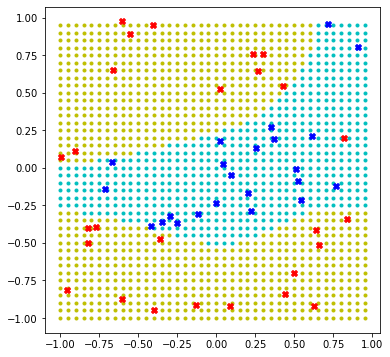

In [4]:
import matplotlib.pyplot as plt
P = 50
b = 1
w = np.array([-1/0.64, -1/0.25])
[X,Y] = pontos_2d(b,w,P)
N = 2
layer_sizes = [N,3,2,1]
w = w_initializer(layer_sizes,1)  # 0 -> zeros   e 1 -> rand 
print(w)

its=3000
alpha=10
w=grad_descent(layer_sizes,alpha,its,w,X,Y)
print(w)

plt.figure(figsize = (6,6))
S=40 #tamanho da malha que vou desenhar
dx=2.0/S #tamanho do delta_x
u=np.zeros(2)
u[1]=-1.0
for i in range(S):
    u[0]=-1.0
    for j in range(S):
        m = model(w,u)
        if m > 0:
            plt.scatter(u[0],u[1],marker = '.',c='c')
        else:
            plt.scatter(u[0],u[1],marker = '.',c='y')
        u[0] += dx
    u[1] += dx
    


#print(rn_grad(layer_sizes,w,X,Y))
#plt.figure(figsize = (6,6))
for i in range(P):
    if Y[i] > 0:
        plt.scatter(X[0,i],X[1,i],marker = 'X',c='b')
    else:
        plt.scatter(X[0,i],X[1,i],marker = 'X',c='r')